<a href="https://colab.research.google.com/github/Mestevam1976/imersao_dados_alura_4_edicao/blob/main/Imers%C3%A3o_de_Dados_Alura_M%C3%A1rcio_Aula_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imersão Dados

Antes de tudo temos que importar uma biblioteca chamada <b>Pandas</b>, ela é específica para trabalharmos com DataFrames (que são os dados organizados como uma tabela de Excel, por exemplo)

In [104]:
import pandas as pd
import numpy as np
import squarify  # lib para o TreeMap

Depois de importado a biblioteca Pandas, indicamos onde está o arquivo que queremos trabalhar, no caso, é um endereço na internet, logo, temos que atribuir esse endereço em uma variável, no caso, chamei ela de "caminho".

Depois, criamos outra variável e acionamos a biblioteca Pandas para fazer a leitura desse arquivo (que está no formato .csv (valores separados por vírgula), esse formato pode ser diverso: html, .json, pdf).

Após fazer a leitura, pedimos para exibir somente as 5 primeiras linhas desse DataFrame com o comando .head() - que é o cabeçalho do DataFrame.

In [105]:
caminho = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"

dados = pd.read_csv(caminho)

dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


Uma boa prática para saber como está o DataFrame, além da visualização dele como foi feita acima, podemos usar o comando .info(), que mostra como estão gravados os registros e em quais formatos eles se encontram.

Note na tabela abaixo que a tabela "Valor" possui Dtype = object. Com esse formato não conseguimos realizar operações matemáticas.

In [106]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [107]:
dados.Valor # Aqui é uma forma de exibir somente a coluna Valor e, quando exibimos uma única coluna chamamos ela de Serie. Duas ou mais colunas é um DataFrame.

0                                R$ 7.000.000
1                                R$ 3.700.000
2                                  R$ 380.000
3                                  R$ 685.000
4                                  R$ 540.000
                         ...                 
10003                              R$ 665.000
10004                            R$ 2.300.000
10005                            R$ 1.050.000
10006    R$ 2.200\n                      /Mês
10007                              R$ 270.000
Name: Valor, Length: 10008, dtype: object

A visualização padrão do DataFrame exibe as primeiras e as últimas linhas dos registros, note que o arquivo possui 10.008 registros (começa com o registro 0)

In [108]:
dados.Valor[10006] # Aqui estou chamando somente o registro numero 10.006, pois, na consulta acima ele mostra que está registrado diferente:

'R$ 2.200\n                      /Mês'

# Tratamento e Limpeza dos Dados:

<hr>

Para execução dos cálculos aritméticos é mandatório transformar os registros em valores numéricos e, antes de fazer isso, temos que remover todas as interferências para essa conversão, no caso, temos que remover o R cifrão (tem um espaço depois do $), temos que remover os pontos de milhares (.) e por fim, tratar os registros que adicionaram informações à mais do que os números, no exemplo do registro 10.006, além do 2.200, foi registrado "\n            /Mês".

In [109]:
dados["Valor"] = dados["Valor"].str.replace("R$ ","", regex=False) # Aqui removemos o R$ e o espaço a frente dele

In [110]:
dados.Valor = dados.Valor.str.replace(".", "", regex=False) # Aqui removemos os pontos de milhares (.)

In [111]:
dados.Valor.sample(30) # Aqui fazemos uma amostragem de 30 elementos para ver a formatação

6872                              3600000
121                                486000
9366                               800000
9826    13000\n                      /Mês
6423                              6500000
5637                              1360000
9109                               690000
1163                              8500000
9584                               800000
3131                              1100000
1599                              1450000
2668                              2500000
3493                              1950000
440      3800\n                      /Mês
4735                              1595000
9671                               380000
4840                              1200000
6794                             18900000
7722                              7000000
1477                              7500000
3027                              9500000
8550                              1300000
3840                              1190000
2647                              

In [112]:
dados.Valor = dados.Valor.str.replace("\n                      /Mês","", regex=False) # aqui removemos a string (texto) "\n                      /Mês"

In [113]:
dados.Valor = dados.Valor.str.replace("\n                      /Ano","", regex=False) # aqui removemos a string (texto) "\n                      /Ano"

In [114]:
dados.Valor = dados.Valor.str.replace("\n                      /Dia","", regex=False) # aqui removemos a string (texto) "\n                      /Dia"

In [115]:
dados.Valor = dados.Valor.astype(float) # Finalmente convertemos a coluna Valor de object para o formato Float (número decimal)

In [116]:
dados.info() # Após a conversão checamos o DataFrame com o comando .info() e verificamos que a coluna "Valor" agora é do tipo Float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Rua        6574 non-null   object 
 1   Bairro     9996 non-null   object 
 2   Cidade     10008 non-null  object 
 3   Metragem   10008 non-null  int64  
 4   Quartos    10008 non-null  int64  
 5   Banheiros  10008 non-null  int64  
 6   Vagas      10008 non-null  int64  
 7   Valor      10008 non-null  float64
dtypes: float64(1), int64(4), object(3)
memory usage: 625.6+ KB


In [117]:
dados.Valor.min() # Aqui checamos o menor valor

1650.0

In [118]:
dados.Valor.max() # AQui checamos o maior valor

65000000.0

In [119]:
dados.Valor.mean() # E finalmente realizamos a média dos valores da coluna "Valor"

2794169.56205036

In [120]:
dados["Bairro"] = dados["Bairro"].apply(lambda x:str(x).replace("Vila Água Funda", "Água Funda")) # renomeando o bairro 'Vila Água Funda' para 'Água Funda'

In [121]:
b = dados.Bairro.str.startswith('Jardim Trememb')

dados.Bairro[b] # Dois registros como Jardim Tremembe (sem acento) e 01 registro como Jardim Tremembé

1427    Jardim Tremembé
8453    Jardim Tremembe
9651    Jardim Tremembe
Name: Bairro, dtype: object

In [122]:
c = dados.Bairro.str.startswith('Trememb')

dados.Bairro[c] # 19 registros como Bairro Tremembé

51      Tremembé
310     Tremembé
1783    Tremembé
5315    Tremembé
6022    Tremembé
6087    Tremembé
6173    Tremembé
7756    Tremembé
8105    Tremembé
8292    Tremembé
8592    Tremembé
8845    Tremembé
8969    Tremembé
9066    Tremembé
9097    Tremembé
9200    Tremembé
9568    Tremembé
9695    Tremembé
9731    Tremembé
Name: Bairro, dtype: object

In [123]:
d = dados.Bairro.str.fullmatch('Vila Nova Caledônia')

dados.Bairro[d] # Cinco registros como Vila Nova Caledônia (com acento)

5303    Vila Nova Caledônia
5772    Vila Nova Caledônia
7752    Vila Nova Caledônia
7885    Vila Nova Caledônia
8588    Vila Nova Caledônia
Name: Bairro, dtype: object

In [124]:
e = dados.Bairro.str.fullmatch('Vila Nova Caledonia')

dados.Bairro[e] # Dois registros como Vila Nova Caledonia (sem acento) 

2286    Vila Nova Caledonia
2412    Vila Nova Caledonia
Name: Bairro, dtype: object

In [125]:
bairros_vazios = dados.Bairro == 'nan' # Observado que existem 12 registros sem o nome do Bairro

dados[bairros_vazios]

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
7263,"Rua Madalena de Morais, 3773",nan,São Paulo,742,4,8,6,9800.00
7956,Rua Vergueiro,nan,São Paulo,103,3,2,2,640000.00
7996,"Rua Alvorada do Sul, 3773",nan,São Paulo,678,4,8,8,6895000.00
8126,"Rua Professor Eduardo Monteiro, 3773",nan,São Paulo,550,3,5,6,4000000.00
8566,"Avenida Comendador Adibo Ares, 3773",nan,São Paulo,694,4,6,6,3890000.00
8619,"Rua Alvorada do Sul, 3773",nan,São Paulo,683,4,8,8,6895000.00
8739,"Rua Alvorada do Sul, 3773",nan,São Paulo,683,4,8,8,6895000.00
8868,"Rua Professor Eduardo Monteiro, 3773",nan,São Paulo,555,3,5,6,4000000.00
8943,"Rua Santo Eufredo, 3773",nan,São Paulo,846,4,8,8,30000.00
8992,"Rua Professor Eduardo Monteiro, 3773",nan,São Paulo,555,3,5,6,4000000.00


<hr>

#DESAFIOS AULA 01:

1 - Realizar a média da metragem para cada um dos bairros (Paulo)

2 - 2 formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

3 - Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

4 - Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

5 - Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

<hr>

<b>DESAFIO # 1:</b>

Realizar a média da metragem para cada um dos bairros (Paulo)

In [126]:
dados.Metragem.mean() # Checando a Média geral

442.30065947242207

In [127]:
dados.groupby('Bairro').mean()['Metragem'].to_frame().reset_index() # Média das Metragens agrupadas por Bairro 

,Bairro,Metragem
0,Aclimação,253.06
1,Alto da Boa Vista,418.88
2,Alto da Lapa,294.34
3,Alto da Mooca,270.05
4,Alto de Pinheiros,433.44
...,...,...
696,nan,621.33
697,Água Branca,191.00
698,Água Fria,165.42
699,Água Funda,148.43


<hr>

<b>DESAFIO # 2:</b>

Duas formas de selecionar os dados por bairro (consultar os métodos na documentação do pandas) (Thiago)

In [128]:
nome_do_bairro = 'Mooca' # Atribuindo o nome do bairro que se deseja realizar as consultas (válido para os dois métodos abaixo:)

In [129]:
# Método 1: utilizando o Método LOC do Pandas:

dados.loc[dados['Bairro'] == nome_do_bairro].head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00
109,Rua Timbó,Mooca,São Paulo,170,3,2,2,940000.00
247,NaN,Mooca,São Paulo,80,2,2,4,870000.00
2343,Rua Manuel Galvão,Mooca,São Paulo,106,3,3,2,450000.00
2441,"Rua Timbó, 130",Mooca,São Paulo,170,3,1,2,1000000.00


In [130]:
# Método 2: Através do Método Query do Pandas

dados.query('Bairro == @nome_do_bairro ').head() # O @ atribui a string a uma variável existente, no caso a variável nome_do_bairro

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,540000.00
109,Rua Timbó,Mooca,São Paulo,170,3,2,2,940000.00
247,NaN,Mooca,São Paulo,80,2,2,4,870000.00
2343,Rua Manuel Galvão,Mooca,São Paulo,106,3,3,2,450000.00
2441,"Rua Timbó, 130",Mooca,São Paulo,170,3,1,2,1000000.00


<hr>

<b>DESAFIO # 3</b>

 Explorar alguns gráficos na documentação e aplicar nas demais colunas do DF, tentar colocar alguma conclusão (Thiago)

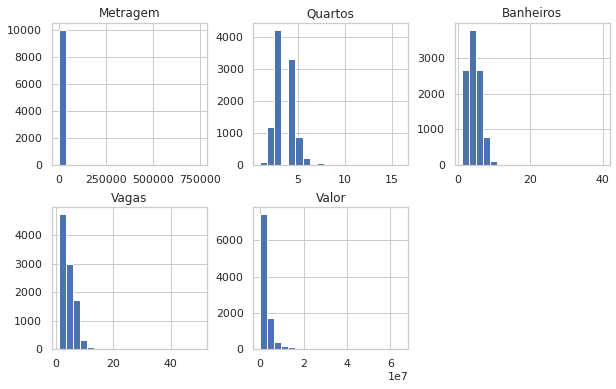

In [131]:
dados.hist(figsize=(10,6), layout=(2,3), bins=20)
print()

In [132]:
import seaborn as sns # importando a biblioteca gráfica Seaborn

sns.set_theme(style="darkgrid")

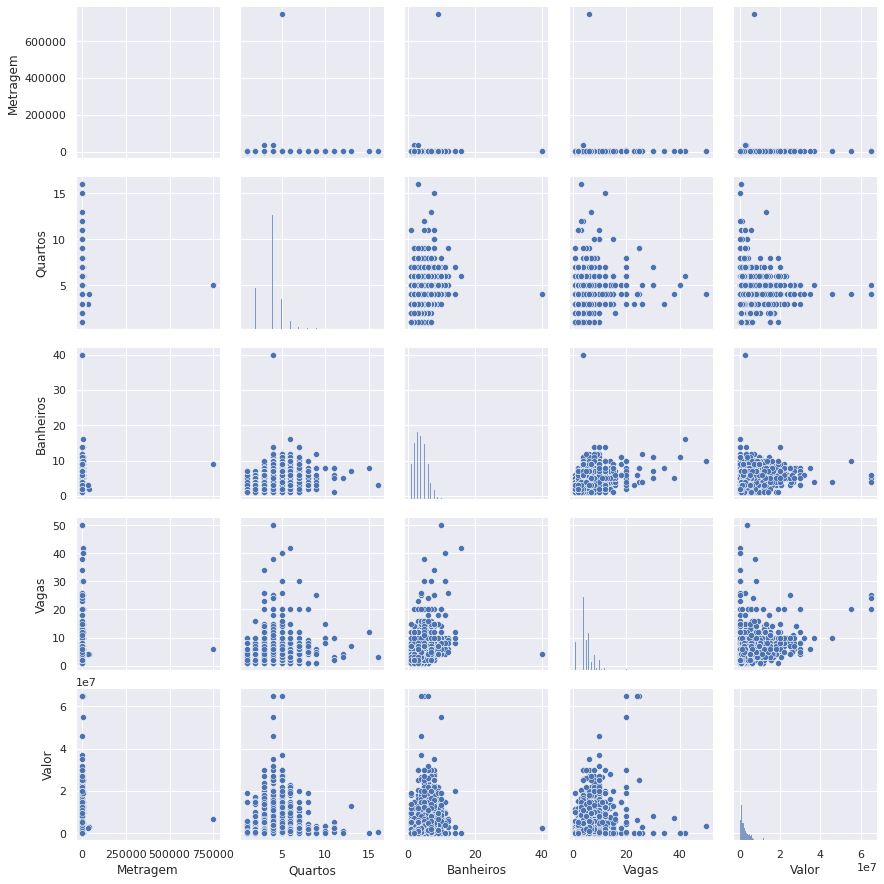

In [133]:
# Gráfico Pairplot do Seaborn - faz a comparação entre pares do dataset

ax = sns.pairplot(dados) # exibe um gráfico de comparação de pares

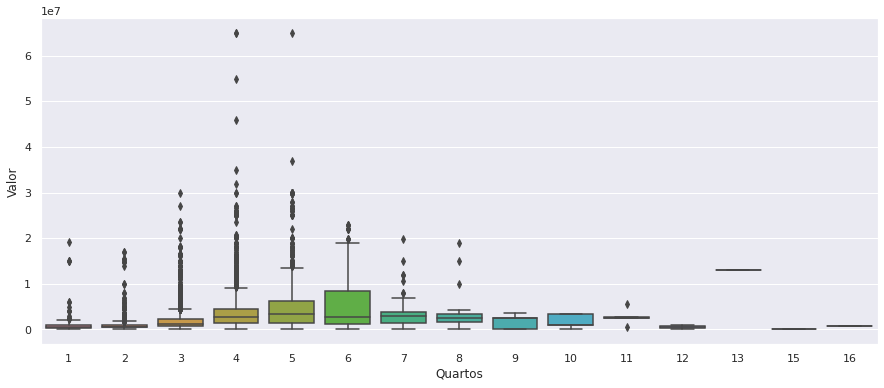

In [134]:
# Gráfico BoxPlot do Seaborn - excelente para visualizar os Outliers em uma distribuição

ax = sns.boxplot(data=dados, x='Quartos', y='Valor')

ax = sns.set(rc = {'figure.figsize':(15,10)})

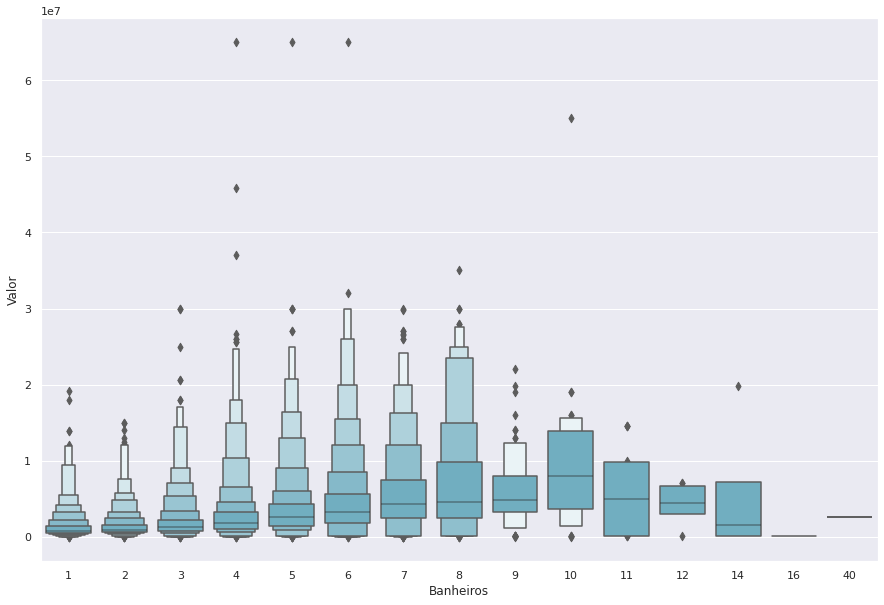

In [135]:
ax = sns.boxenplot(x="Banheiros", y="Valor",color="c",scale="linear", data=dados)

ax = sns.set(rc = {'figure.figsize':(15,6)})

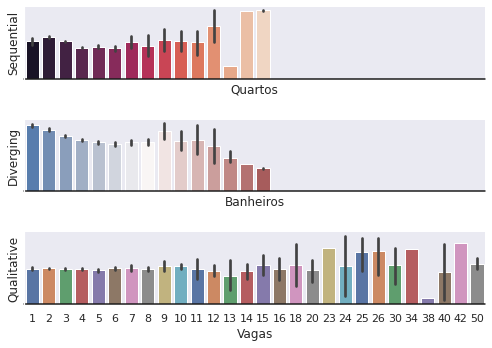

In [136]:
import matplotlib.pyplot as plt

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(7, 5), sharex=True)

rs = np.random.RandomState(8)


y1 = np.arange(1,10009)
sns.barplot(x=dados.Quartos, y=y1, palette="rocket", ax=ax1)
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("Sequential")

y2 = y1 - 5.5
sns.barplot(x=dados.Banheiros, y=y2, palette="vlag", ax=ax2)
ax2.axhline(0, color="k", clip_on=False)
ax2.set_ylabel("Diverging")

y3 = rs.choice(y1, len(y1), replace=False)
sns.barplot(x=dados.Vagas, y=y3, palette="deep", ax=ax3)
ax3.axhline(0, color="k", clip_on=False)
ax3.set_ylabel("Qualitative")

sns.despine(bottom=True)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

<hr>

<b>DESAFIO # 4</b>

 Pegar outros estatísticas dos dados, média, mediana, mim, max (Vivi)

In [137]:
dados.describe().T # Obtendo a contagem dos dados, média, desvio-padrão, quartis, mediana, valor mínimo e máximo:

,count,mean,std,min,25%,50%,75%,max
Metragem,10008.00,442.30,7515.38,10.00,173.00,290.00,460.25,750000.00
Quartos,10008.00,3.48,1.06,1.00,3.00,3.00,4.00,16.00
Banheiros,10008.00,3.88,1.99,1.00,2.00,4.00,5.00,40.00
Vagas,10008.00,4.10,2.82,1.00,2.00,4.00,5.00,50.00
Valor,10008.00,2794169.56,3866248.54,1650.00,750000.00,1600000.00,3350000.00,65000000.00


<hr>

<b>DESAFIO # 5</b>

Descobrir quais são os bairros que não tem nome de Rua. (Vivi)

In [138]:
ruas_sem_nome = dados.Rua.isnull() # localizando as ruas que estão sem nome (campos vazios ou NAN)

In [139]:
dados['Bairro'][ruas_sem_nome].to_frame() # filtrando os nomes dos Bairros que possuem ruas sem nome

,Bairro
3,Jardim Morumbi
11,Jardim Luzitânia
31,Parque da Lapa
56,Chácara Santo Antônio (Zona Sul)
57,Jardim Guedala
...,...
9963,Jardim Petrópolis
9989,Parque Alves de Lima
9991,Vila Formosa
9995,Jardim Leonor


# DESAFIOS AULA 02

1 - Criar uma escala de valores em milhões

2 - Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)

3 - Preço do metro quadrado por bairro e plotar em um gráfico ideal

4 - Explorar as bibliotecas de visualizações e colocar as suas conclusão

5 - Pesquisar um visualização para analisar os quartis, mediana e outliers

<hr>

<b>Desafio # 1</b>

Criar uma escala de valores em milhões

In [140]:
dados["Valor_milhoes"] = dados.Valor/1000000

In [141]:
dados['Valor_milhoes'].sample(5)

2608   4.20
5082   5.00
4544   0.90
7268   1.20
3209   0.04
Name: Valor_milhoes, dtype: float64

In [142]:
# Setando a precisão dos cálculos (número de casas decimais)

pd.set_option('display.precision', 2) # números em geral
pd.set_option('display.float_format', lambda x: '%.2f' %x) # precisão dos números tipo float

In [143]:
dados.describe(include='all').T # Checando os dados com o Describe incluindo as variáveis não numéricas

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Rua,6574,3130,Rua Alberto Faria,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bairro,10008,701,Alto de Pinheiros,409,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cidade,10008,1,São Paulo,10008,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Metragem,10008.00,NaN,NaN,NaN,442.30,7515.38,10.00,173.00,290.00,460.25,750000.00
Quartos,10008.00,NaN,NaN,NaN,3.48,1.06,1.00,3.00,3.00,4.00,16.00
Banheiros,10008.00,NaN,NaN,NaN,3.88,1.99,1.00,2.00,4.00,5.00,40.00
Vagas,10008.00,NaN,NaN,NaN,4.10,2.82,1.00,2.00,4.00,5.00,50.00
Valor,10008.00,NaN,NaN,NaN,2794169.56,3866248.54,1650.00,750000.00,1600000.00,3350000.00,65000000.00
Valor_milhoes,10008.00,NaN,NaN,NaN,2.79,3.87,0.00,0.75,1.60,3.35,65.00


<hr>

<b>Desafio # 2</b>

Deixar o gráfico do histograma de valores legível (alterar labels, cores, título, escala)



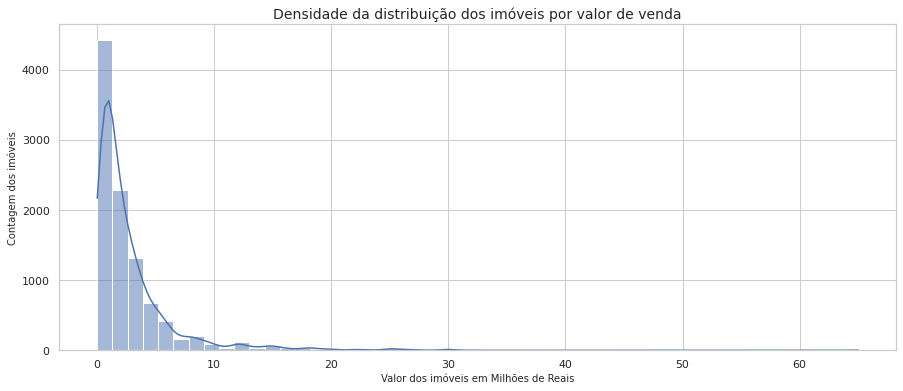

In [144]:
sns.set_style('whitegrid')
sns.histplot(data=dados, x='Valor_milhoes', bins = 50, kde = True)
plt.xlabel('Valor dos imóveis em Milhões de Reais', fontsize=10)
plt.ylabel('Contagem dos imóveis', fontsize=10)
plt.title('Densidade da distribuição dos imóveis por valor de venda', fontsize=14)
print()

<hr>

<b>Desafio # 3</b>

Preço do metro quadrado por bairro e plotar em um gráfico ideal

In [222]:
dados['Preco_m_quadrado'] = dados.Valor/dados.Metragem

preco_metro_quadrado_bairro = dados.groupby('Bairro')['Preco_m_quadrado'].mean().head(20).reset_index()

metro_quadrado_por_bairro = preco_metro_quadrado_bairro.sort_values(by='Preco_m_quadrado', ascending=False)

metro_quadrado_por_bairro

,Bairro,Preco_m_quadrado
4,Alto de Pinheiros,10172.23
18,Brooklin Novo,9884.44
12,Boaçava,9039.68
2,Alto da Lapa,7078.57
17,Brooklin,7021.03
0,Aclimação,6875.85
19,Brooklin Paulista,6591.02
9,Bela Aliança,6203.09
7,Barra Funda,6173.43
15,Bosque da Saúde,6024.42


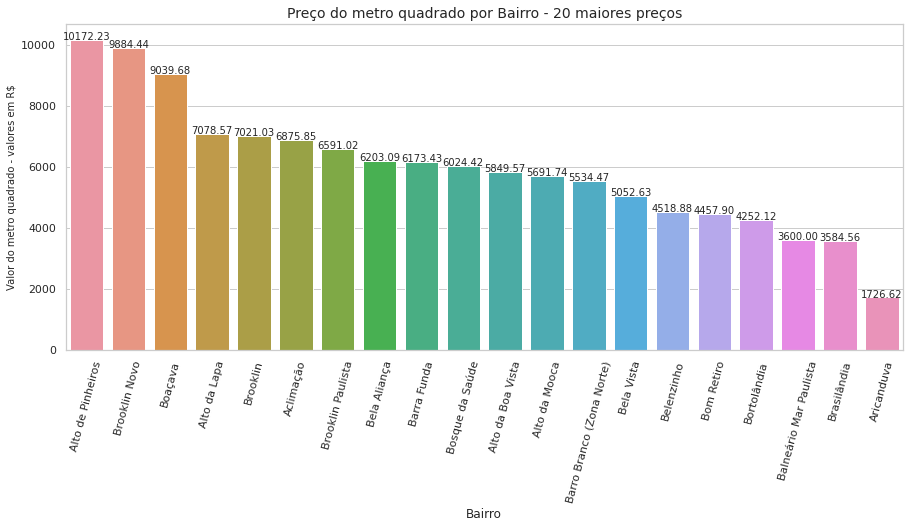

In [181]:
# Plotando um gráfico de barras com 20 valores do metro quadrado por bairro:

ax = sns.barplot(data=metro_quadrado_por_bairro, x='Bairro', y='Preco_m_quadrado')
ax.set_xticklabels(ax.get_xticklabels(),rotation = 75)
plt.title('Preço do metro quadrado por Bairro - 20 maiores preços', fontsize=14)
plt.ylabel('Valor do metro quadrado - valores em R$', fontsize=10)

# Para adicionar o rótulo em cima das colunas exibindo valor:

for rotulo in ax.patches:
  height = rotulo.get_height()
  ax.text(rotulo.get_x()+rotulo.get_width()/2.,height + 3,'{:1.2f}'.format((height)),ha='center', fontsize=10)


print()

### Avaliação: Os valores estão coerentes com a localização dos imóveis, sendo os valores mais altos em áreas nobres da capital paulita.

<b>Desafio # 4:</b>

Explorar as bibliotecas de visualizações e colocar as suas conclusão

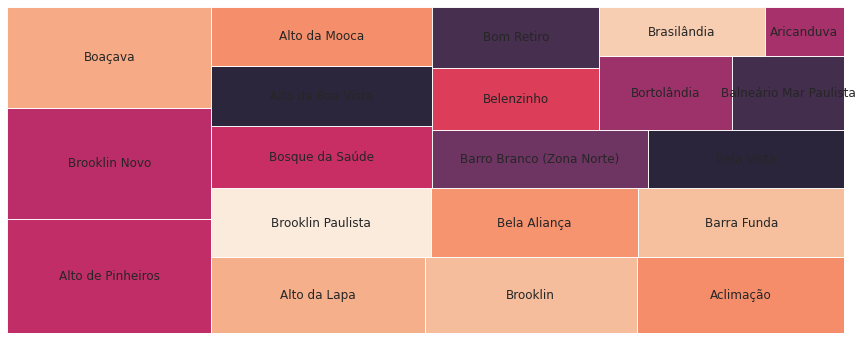

In [224]:
# Plotando um TreeMap:

squarify.plot(sizes=metro_quadrado_por_bairro['Preco_m_quadrado'], label=metro_quadrado_por_bairro['Bairro'], alpha=.9 )
plt.axis('off')
plt.show()

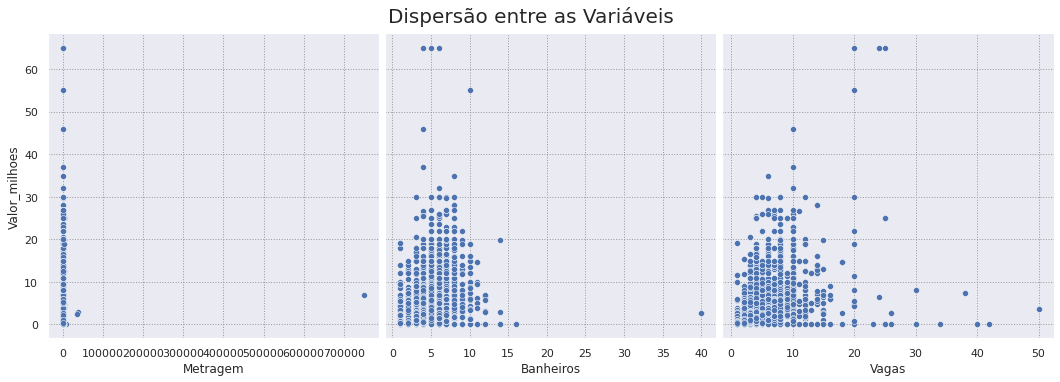

In [254]:
# Plotando um gráfico de comparação entre as variáveis do dataset:

ax = sns.pairplot(dados, y_vars='Valor_milhoes', x_vars=['Metragem', 'Banheiros', 'Vagas'], height=5)

ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

print()

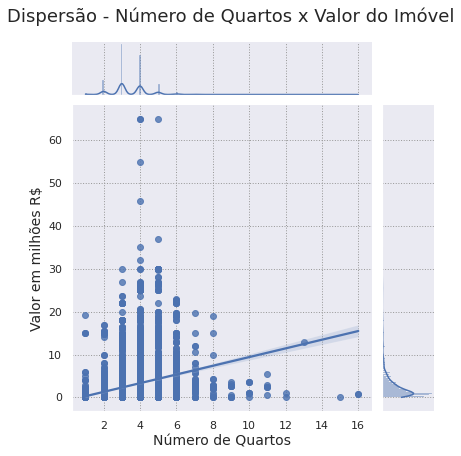

In [288]:
# Mais uma opção de visualização da Dispersão entre duas variáveis, o gráfico Jointplot do Seaborn

ax = sns.jointplot(x='Quartos', y='Valor_milhoes', data=dados, kind='reg')
ax.fig.suptitle('Dispersão - Número de Quartos x Valor do Imóvel', fontsize=18, y = 1.05)
ax.set_axis_labels('Número de Quartos', 'Valor em milhões R$', fontsize=14)
ax
print()

<hr>

<b>Desafio # 5</b>

Pesquisar um visualização para analisar os quartis, mediana e outliers

<img src="https://www.alura.com.br/artigos/assets/boxplot/imagem-2.png">

In [258]:
# Definindo as medidas separatrizes para Valor_milhoes:

Q1 = dados.Valor_milhoes.quantile(.25) # 1º Quartil
Q3 = dados.Valor_milhoes.quantile(.75) # 3º Quartil

IIQ = Q3-Q1 # Intervalo Interquartis

limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [275]:
# De posso das medidas separatrizes filtramos o dataset para eliminar os Outliers:

selecao_valor = (dados.Valor_milhoes >= limite_inferior) & (dados.Valor_milhoes <= limite_superior)

dados_new = dados[selecao_valor]

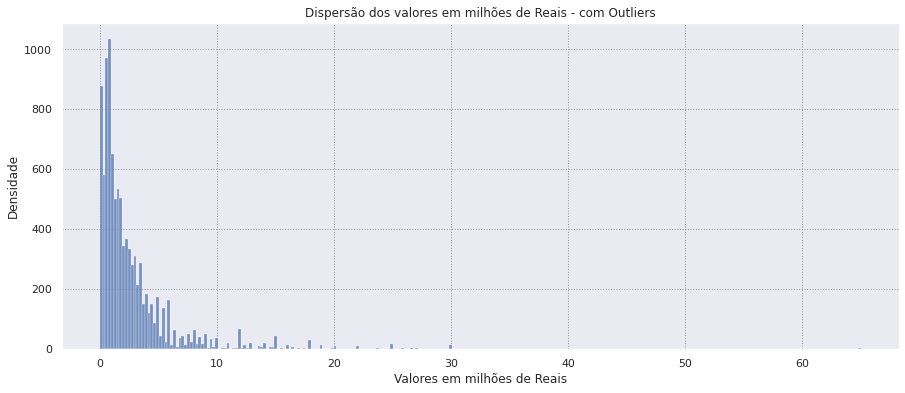

In [286]:
# Plotando os resultados, primeiro sem a filtragem dos Outliers:

ax = sns.histplot(data=dados, x="Valor_milhoes")
plt.xlabel('Valores em milhões de Reais')
plt.ylabel('Densidade')
plt.title('Dispersão dos valores em milhões de Reais - com Outliers')

print()

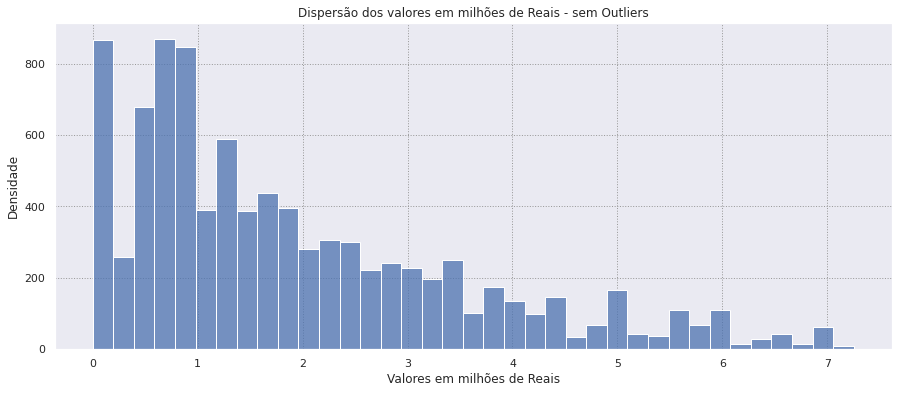

In [289]:
# Filtrando os Outliers o gráfico se apresenta melhor distribuído:

sns.histplot(data=dados_new, x="Valor_milhoes")
plt.xlabel('Valores em milhões de Reais')
plt.ylabel('Densidade')
plt.title('Dispersão dos valores em milhões de Reais - sem Outliers')

print()